<a href="https://colab.research.google.com/github/ADRIANVM117/proyectos_propios/blob/main/Estadistica/analisis_exploratorio/como_hacer_un_EDA_p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adrian Vazquez 
## Continuación de Como hacer un EDA pt2

In [64]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

no_hitters = [ 843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
        715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
        104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
        166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
        308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
       1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
         77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
        557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
       1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
        219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
        176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
        774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
        192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
        156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
        576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
       3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
        110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
        192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
       1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
       2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
       1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
        420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
        876,  381,  905,  156,  419,  239,  119,  129,  467]
nohitter_times = np.array(no_hitters)

¿Con qué frecuencia se producen no-hitters?
El número de partidos jugados entre cada no-hitter en la era moderna (1901-2015) de las Grandes Ligas de Béisbol se almacena en la matriz nohitter_times.

Si se asume que los no-hitters se describen como un proceso de Poisson, entonces el tiempo entre los no-hitters se distribuye exponencialmente. Como has visto, la distribución exponencial tiene un único parámetro, que llamaremos , el tiempo de intervalo típico. El valor del parámetro que hace que la distribución exponencial se ajuste mejor a los datos es el tiempo medio del intervalo (donde el tiempo está en unidades de número de juegos) entre no-hitters.

Calcule el valor de este parámetro a partir de los datos. A continuación, utilice np.random.exponential() para "repetir" la historia del béisbol de las Grandes Ligas extrayendo los tiempos entre los no-hitters de una distribución exponencial con el valor encontrado y trace el histograma como una aproximación a la PDF.


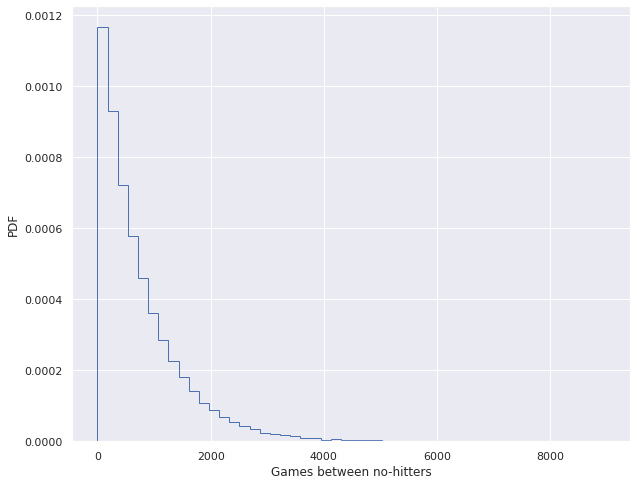

In [65]:
# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
sns.set()
plt.figure(figsize = (10,8))
_ = plt.hist(inter_nohitter_time,
             bins = 50, density = True, histtype = 'step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

- Distribución expon3ncial tipica con un maximo en cero y con decremento al cabo de que avanza del tiempo 

- ¿Siguen los datos nuestra historia?

- Has modelado los no-hitters utilizando una distribución exponencial. Crea una ECDF de los datos reales. Superponga la CDF teórica con la ECDF de los datos. Esto te ayuda a verificar que la distribución exponencial describe los datos observados.

In [66]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, len(x) + 1) / n

    return x, y

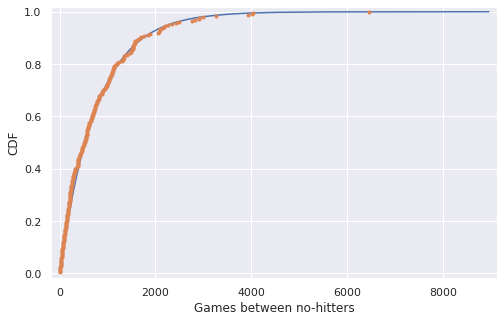

In [67]:
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
sns.set()
plt.figure(figsize = (8,5))
plt.plot(x_theor, y_theor)
plt.plot(x,y, marker= '.', linestyle='none')

# Margins and axis labels
plt.margins(.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()

Parece que los no-hitters en la era moderna de las Grandes Ligas de Béisbol están distribuidos exponencialmente. Según la historia de la distribución exponencial, esto sugiere que se trata de un proceso aleatorio; el momento en que se producirá un no-hitter es independiente del momento en que se produjo el último no-hitter.

Ahora tome una muestra de una distribución exponencial que sea el doble de grande que la óptima. Hazlo de nuevo con la mitad de tamaño. Haz las FDA de estas muestras y superpónlas a tus datos. Puedes ver que no reproducen tan bien los datos. Por lo tanto, la calculada a partir de la media de los tiempos entre lanzamientos es la óptima, ya que es la que mejor reproduce los datos.

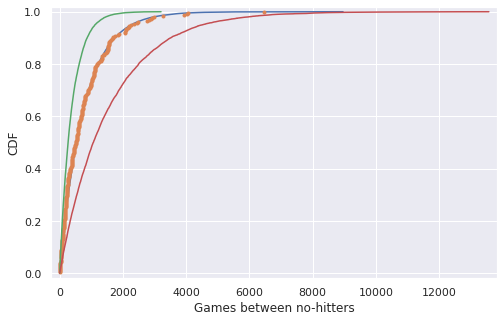

In [68]:
# Plot the theoretical CDFs
plt.figure(figsize = (8,5))
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2, 10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(2*tau, 10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)

x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

# Show the plot
plt.show()

Obsérvese que el valor de tau dado por la media es el que mejor se ajusta a los datos. De este modo, tau es un parámetro óptimo.

In [69]:
## matrices 

arr1  = [ 9.5, 49.2,  1. , 11.2,  9.8, 60. , 50.2, 51.2,  0.6,  1. ,  8.5,
        6.1,  9.8,  1. , 42.2, 77.2, 18.7, 22.8,  8.5, 43.9,  1. ,  1. ,
        1.5, 10.8, 11.9,  3.4,  0.4,  3.1,  6.6, 33.7, 40.4,  2.3, 17.2,
        0.7, 36.1,  1. , 33.2, 55.9, 30.8, 87.4, 15.4, 54.6,  5.1,  1.1,
       10.2, 19.8,  0. , 40.7, 57.2, 59.9,  3.1, 55.7, 22.8, 10.9, 34.7,
       32.2, 43. ,  1.3,  1. ,  0.5, 78.4, 34.2, 84.9, 29.1, 31.3, 18.3,
       81.8, 39. , 11.2, 67. ,  4.1,  0.2, 78.1,  1. ,  7.1,  1. , 29. ,
        1.1, 11.7, 73.6, 33.9, 14. ,  0.3,  1. ,  0.8, 71.9, 40.1,  1. ,
        2.1,  3.8, 16.5,  4.1,  0.5, 44.4, 46.3, 18.7,  6.5, 36.8, 18.6,
       11.1, 22.1, 71.1,  1. ,  0. ,  0.9,  0.7, 45.5,  8.4,  0. ,  3.8,
        8.5,  2. ,  1. , 58.9,  0.3,  1. , 14. , 47. ,  4.1,  2.2,  7.2,
        0.3,  1.5, 50.5,  1.3,  0.6, 19.1,  6.9,  9.2,  2.2,  0.2, 12.3,
        4.9,  4.6,  0.3, 16.5, 65.7, 63.5, 16.8,  0.2,  1.8,  9.6, 15.2,
       14.4,  3.3, 10.6, 61.3, 10.9, 32.2,  9.3, 11.6, 20.7,  6.5,  6.7,
        3.5,  1. ,  1.6, 20.5,  1.5, 16.7,  2. ,  0.9]

arr2 = [1.769, 2.682, 2.077, 2.132, 1.827, 3.872, 2.288, 5.173, 1.393,
       1.262, 2.156, 3.026, 2.033, 1.324, 2.816, 5.211, 2.1  , 1.781,
       1.822, 5.908, 1.881, 1.852, 1.39 , 2.281, 2.505, 1.224, 1.361,
       1.468, 2.404, 5.52 , 4.058, 2.223, 4.859, 1.267, 2.342, 1.579,
       6.254, 2.334, 3.961, 6.505, 2.53 , 2.823, 2.498, 2.248, 2.508,
       3.04 , 1.854, 4.22 , 5.1  , 4.967, 1.325, 4.514, 3.173, 2.308,
       4.62 , 4.541, 5.637, 1.926, 1.747, 2.294, 5.841, 5.455, 7.069,
       2.859, 4.018, 2.513, 5.405, 5.737, 3.363, 4.89 , 1.385, 1.505,
       6.081, 1.784, 1.378, 1.45 , 1.841, 1.37 , 2.612, 5.329, 5.33 ,
       3.371, 1.281, 1.871, 2.153, 5.378, 4.45 , 1.46 , 1.436, 1.612,
       3.19 , 2.752, 3.35 , 4.01 , 4.166, 2.642, 2.977, 3.415, 2.295,
       3.019, 2.683, 5.165, 1.849, 1.836, 2.518, 2.43 , 4.528, 1.263,
       1.885, 1.943, 1.899, 1.442, 1.953, 4.697, 1.582, 2.025, 1.841,
       5.011, 1.212, 1.502, 2.516, 1.367, 2.089, 4.388, 1.854, 1.748,
       2.978, 2.152, 2.362, 1.988, 1.426, 3.29 , 3.264, 1.436, 1.393,
       2.822, 4.969, 5.659, 3.24 , 1.693, 1.647, 2.36 , 1.792, 3.45 ,
       1.516, 2.233, 2.563, 5.283, 3.885, 0.966, 2.373, 2.663, 1.251,
       2.052, 3.371, 2.093, 2.   , 3.883, 3.852, 3.718, 1.732, 3.928]

illiteracy = np.array(arr1)

fertility = np.array(arr2)



In [70]:
def pearson_r(x,y):
  corr_mat = np.corrcoef(x,y)
  
  return corr_mat[0,1]

- EDA de los datos de alfabetización/fertilidad


- Estudiaremos la correlación entre la alfabetización femenina y la fecundidad (definida como el número medio de hijos nacidos por mujer) en todo el mundo. Para facilitar el análisis y la interpretación, trabajaremos con la tasa de analfabetismo.

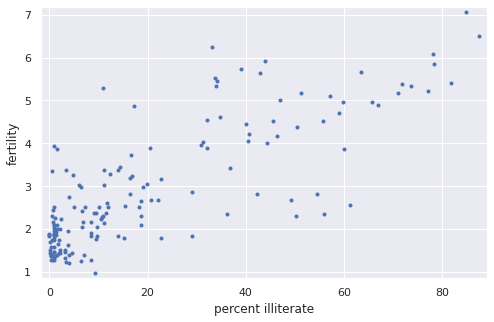

0.8041324026815341


In [71]:
# Plot the illiteracy rate versus fertility
sns.set()
plt.figure(figsize = (8,5))
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print(pearson_r(illiteracy, fertility))


La correlación entre el analfabetismo y la fecundidad se puede ver a simple vista, y por el importante coeficiente de correlación de Pearson de 0,8. Es difícil de resolver en el gráfico de dispersión, pero hay muchos puntos en torno a un analfabetismo cercano a cero y alrededor de 1,8 hijos/mujer.

## Regresión lineal

- Supondremos que la fecundidad es una función lineal de la tasa de analfabetismo femenino. Es decir, $ f = ai + b  $ , donde $ a $ es la pendiente y  $b  $ es el intercepto. Podemos pensar en el intercepto como la tasa de fertilidad mínima, probablemente entre uno y dos. La pendiente nos indica cómo varía la tasa de fertilidad con el analfabetismo. Podemos encontrar la línea de mejor ajuste utilizando np.polyfit().

- Traza los datos y la línea de mejor ajuste. Imprime la pendiente y el intercepto. (Piensa: ¿cuáles son sus unidades?)

slope = 0.049798548090634186 children per woman / percent illiterate
intercept = 1.888050610636557 children per woman


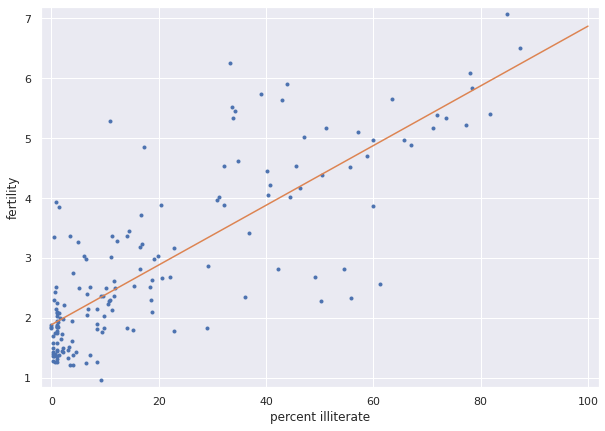

In [72]:
# Plot the illiteracy rate versus fertility
sns.set()
plt.figure(figsize = (10,7))
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy, fertility, 1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0, 100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()


## Bootstraping 

- El bootstrap es un mecanismo propio de la estadística y la econometría que se centra en el remuestreo de datos dentro de una muestra aleatoria o al azar. Su principal uso es hallar una aproximación a la distribución de la variable analizada.

- https://support.minitab.com/es-mx/minitab/20/help-and-how-to/probability-distributions-random-data-and-resampling-analyses/supporting-topics/resampling-analyses/what-is-bootstrapping/


## Visualización de muestras bootstrap

- En este ejercicio, generarás muestras bootstrap a partir del conjunto de datos de precipitación anual medidos en la estación meteorológica de Sheffield, en el Reino Unido, desde 1883 hasta 2015. Los datos se almacenan en el array NumPy rainfall en unidades de milímetros (mm). Al mostrar gráficamente las muestras bootstrap con un ECDF, puedes hacerte una idea de cómo el muestreo bootstrap permite realizar descripciones probabilísticas de los datos.




In [73]:
  a = [875.5,  648.2,  788.1,  940.3,  491.1,  743.5,  730.1,  686.5,
        878.8,  865.6,  654.9,  831.5,  798.1,  681.8,  743.8,  689.1,
        752.1,  837.2,  710.6,  749.2,  967.1,  701.2,  619. ,  747.6,
        803.4,  645.6,  804.1,  787.4,  646.8,  997.1,  774. ,  734.5,
        835. ,  840.7,  659.6,  828.3,  909.7,  856.9,  578.3,  904.2,
        883.9,  740.1,  773.9,  741.4,  866.8,  871.1,  712.5,  919.2,
        927.9,  809.4,  633.8,  626.8,  871.3,  774.3,  898.8,  789.6,
        936.3,  765.4,  882.1,  681.1,  661.3,  847.9,  683.9,  985.7,
        771.1,  736.6,  713.2,  774.5,  937.7,  694.5,  598.2,  983.8,
        700.2,  901.3,  733.5,  964.4,  609.3, 1035.2,  718. ,  688.6,
        736.8,  643.3, 1038.5,  969. ,  802.7,  876.6,  944.7,  786.6,
        770.4,  808.6,  761.3,  774.2,  559.3,  674.2,  883.6,  823.9,
        960.4,  877.8,  940.6,  831.8,  906.2,  866.5,  674.1,  998.1,
        789.3,  915. ,  737.1,  763. ,  666.7,  824.5,  913.8,  905.1,
        667.8,  747.4,  784.7,  925.4,  880.2, 1086.9,  764.4, 1050.1,
        595.2,  855.2,  726.9,  785.2,  948.8,  970.6,  896. ,  618.4,
        572.4, 1146.4,  728.2,  864.2,  793. ]

rainfall = np.array(a) 

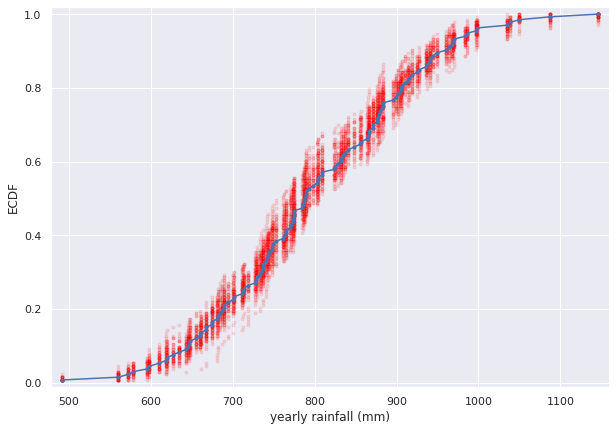

In [74]:
plt.figure(figsize = (10,7))
for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)

    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color ='red', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes

plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

- Obsérvese cómo las muestras bootstrap dan una idea de cómo se reparte la distribución de las precipitaciones.

## Generar muchas réplicas de bootstrap

- Función, draw_bs_reps(data, func, size=1), que genera muchas réplicas bootstrap a partir del conjunto de datos. Esta función le será útil una y otra vez cuando calcule los intervalos de confianza y más tarde cuando haga pruebas de hipótesis.

In [75]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [76]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates


## Réplicas bootstrap de la media y el SEM

- Calcularás una estimación bootstrap de la función de densidad de probabilidad de la precipitación media anual en la Estación Meteorológica de Sheffield. Recuerda que estamos estimando la precipitación media anual que obtendríamos si la Estación Meteorológica de Sheffield pudiera repetir todas las mediciones desde 1883 hasta 2015 una y otra vez. 
- Se trata de una estimación probabilística de la media. Si representas la PDF como un histograma, verás que es normal.

- De hecho, se puede demostrar teóricamente que, en condiciones no demasiado restrictivas, el valor de la media siempre se distribuirá normalmente. (Esto no se cumple en general, sólo para la media y algunos otros estadísticos). La desviación estándar de esta distribución, llamada error estándar de la media, o SEM, viene dada por la desviación estándar de los datos dividida por la raíz cuadrada del número de puntos de datos. Es decir, para un conjunto de datos



Error estandar de la media : 10.510549150506188
Desviación estándar de las réplicas bootstrap : 10.358764199574097


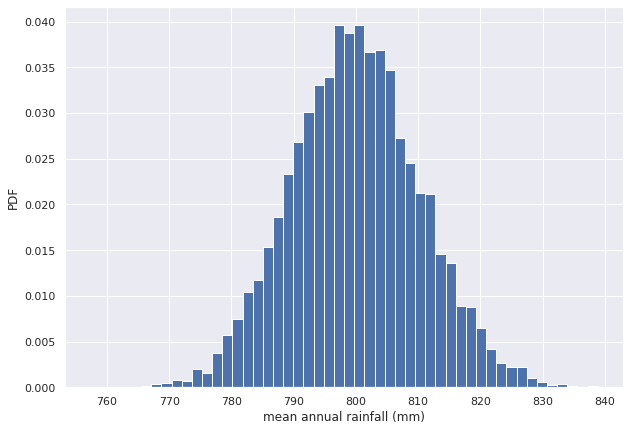

In [77]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.mean, 10000)

# Compute and print SEM
sem =  np.std(rainfall) / np.sqrt(len(rainfall))
print('Error estandar de la media :', sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print('Desviación estándar de las réplicas bootstrap :', bs_std)

# Make a histogram of the results
sns.set()
plt.figure(figsize=(10,7))
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


-  Observe que el SEM que obtuvimos de la expresión conocida y de las réplicas bootstrap es el mismo y la distribución de las réplicas bootstrap de la media es Normal.


## Intervalos de confianza

- https://www.cienciadedatos.net/documentos/pystats04-bootstrapping-python.html#:~:text=El%20algoritmo%20de%20bootstrapping%20para,observaciones%20pertenecientes%20a%20dicho%20grupo.

In [78]:
np.percentile( bs_replicates,[2.5, 97.5])

array([779.96900376, 820.62793233])

- Con un intervalo de confianza del 95% podemos decir que los resultados se encuentran entre 780 y 821

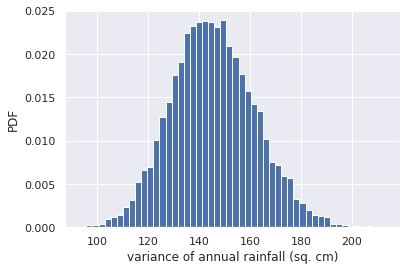

In [79]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.var, 10000)

# Put the variance in units of square centimeters
x = bs_replicates/100

# Make a histogram of the results
_ = plt.hist(x, bins = 50 , density = True )
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


### Intervalo de confianza sobre la tasa de no-hitters

- Consideremos de nuevo los intervalos entre no-hitters para la era moderna del béisbol. Genere 10.000 réplicas bootstrap del parámetro óptimo . Trace un histograma de sus réplicas e informe de un intervalo de confianza del 95%.

95% confidence interval = [663.65229084 869.79741036] games


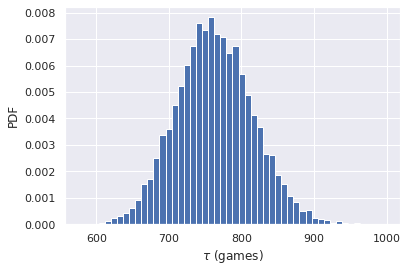

In [80]:
# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(nohitter_times, np.mean, 10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

Esto le da una estimación de cuál es el tiempo típico entre los no-hitters. Podría ser entre 660 y 870 juegos.

### Una función para hacer bootstrap de pares

- El bootstrap de pares implica el remuestreo de pares de datos. Cada colección de pares se ajusta con una línea, en este caso usando np.polyfit(). Hacemos esto una y otra vez, obteniendo réplicas bootstrap de los valores de los parámetros. Para tener una herramienta útil para hacer bootstrap de pares, se escribirá una función para realizar bootstrap de pares en un conjunto de datos x,y.

In [81]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

###Bootstrap de pares de los datos de alfabetización/fertilidad

- Utilizando la función pasada, realice un bootstrap de pares para trazar un histograma que describa la estimación de la pendiente de los datos de analfabetismo/fertilidad. También informe del intervalo de confianza del 95% de la pendiente. Los datos están disponibles en las matrices NumPy analfabetismo y fertilidad.

[0.04389859 0.05528877]


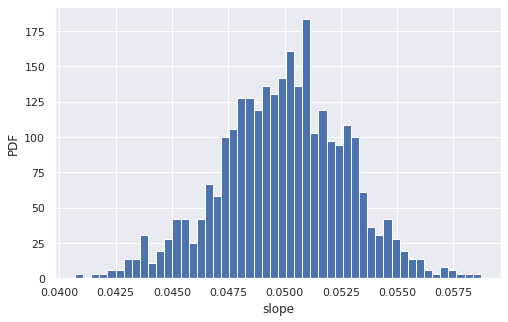

In [82]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy, fertility, size = 1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps,[2.5, 97.5] ))

# Plot the histogram
sns.set()
plt.figure(figsize = (8,5))
_ = plt.hist(bs_slope_reps, bins=50, density=True)

_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

### Trazado de regresiones bootstrap

- Una buena manera de visualizar la variabilidad que podríamos esperar en una regresión lineal es trazar la línea que obtendría de cada réplica bootstrap de la pendiente y el intercepto. Haga esto para las 100 primeras réplicas bootstrap de la pendiente y el intercepto (almacenadas como bs_slope_reps y bs_intercept_reps).

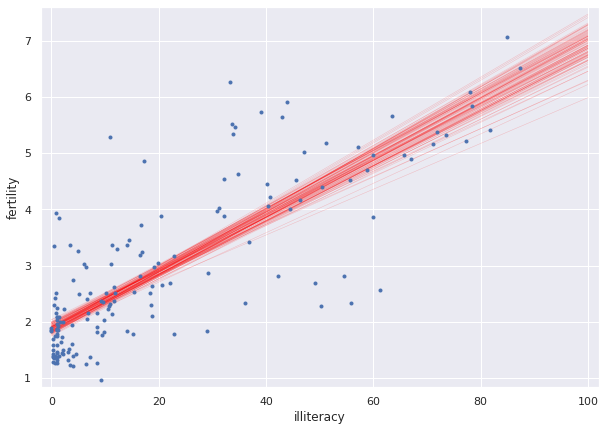

In [83]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0, 100])
plt.figure(figsize = (10,7))
# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, 
                 bs_slope_reps[i] * x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data

_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

## Prueba de hipotesis 

<b> Permutación </b>
- ordenamiento aleatorio dentro de una matriz 


## Generación de una muestra de permutación

- El muestreo de permutación es una buena forma de simular la hipótesis de que dos variables tienen distribuciones de probabilidad idénticas. Esta es a menudo una hipótesis que se quiere probar, así que en este ejercicio, escribirás una función para generar una muestra de permutación de dos conjuntos de datos.

- Recuerda, una muestra de permutación de dos matrices que tienen respectivamente n1 y n2 entradas se construye concatenando las matrices juntas, revolviendo el contenido de la matriz concatenada, y luego tomando las primeras n1 entradas como la muestra de permutación de la primera matriz y las últimas n2 entradas como la muestra de permutación de la segunda matriz.


In [84]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data =np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [85]:
a = [ 66.2,  39.7,  76.4,  26.5,  11.2,  61.8,   6.1,  48.4,  89.2,
       104. ,  34. ,  60.6,  57.1,  79.1,  90.9,  32.3,  63.8,  78.2,
        27.5,  43.4,  30.1,  17.3,  77.5,  44.9,  92.2,  39.6,  79.4,
        66.1,  53.5,  98.5,  20.8,  55.5,  39.6,  56. ,  65.1,  14.8,
        13.2,  88.1,   8.4,  32.1,  19.6,  40.4,   2.2,  77.5, 105.4,
        77.2,  38. ,  27.1, 111.8,  17.2,  26.7,  23.3,  77.2,  87.2,
        27.7,  50.6,  60.3,  15.1,   6. ,  29.4,  39.3,  56.3,  80.4,
        85.3,  68.4,  72.5,  13.3,  28.4,  14.7,  37.4,  49.5,  57.2,
        85.9,  82.1,  31.8, 126.6,  30.7,  41.4,  33.9,  13.5,  99.1,
        70.2,  91.8,  61.3,  13.7,  54.9,  62.5,  24.2,  69.4,  83.1,
        44. ,  48.5,  11.9,  16.6,  66.4,  90. ,  34.9, 132.8,  33.4,
       225. ,   7.6,  40.9,  76.5,  48. , 140. ,  55.9,  54.1,  46.4,
        68.6,  52.2, 108.3,  14.6,  11.3,  29.8, 130.9, 152.4,  61. ,
        46.6,  43.9,  30.9, 111.1,  68.5,  42.2,   9.8, 285.6,  56.7,
       168.2,  41.2,  47.8, 166.6,  37.8,  45.4,  43.2]

rain_june = np.array(a)       

b = [ 83.6,  30.9,  62.2,  37. ,  41. , 160.2,  18.2, 122.4,  71.3,
        44.2,  49.1,  37.6, 114.5,  28.8,  82.5,  71.9,  50.7,  67.7,
       112. ,  63.6,  42.8,  57.2,  99.1,  86.4,  84.4,  38.1,  17.7,
       102.2, 101.3,  58. ,  82. , 101.4,  81.4, 100.1,  54.6,  39.6,
        57.5,  29.2,  48.8,  37.3, 115.4,  55.6,  62. ,  95. ,  84.2,
       118.1, 153.2,  83.4, 104.7,  59. ,  46.4,  50. , 147.6,  76.8,
        59.9, 101.8, 136.6, 173. ,  92.5,  37. ,  59.8, 142.1,   9.9,
       158.2,  72.6,  28. , 112.9, 119.3, 199.2,  50.7,  44. , 170.7,
        67.2,  21.4,  61.3,  15.6, 106. , 116.2,  42.3,  38.5, 132.5,
        40.8, 147.5,  93.9,  71.4,  87.3, 163.7, 141.4,  62.6,  84.9,
        28.8, 121.1,  28.6,  32.4, 112. ,  50. ,  96.9,  81.8,  70.4,
       117.5,  41.2, 124.9,  78.2,  93. ,  53.5,  50.5,  42.6,  47.9,
        73.1, 129.1,  56.9, 103.3,  60.5, 134.3,  93.1,  49.5,  48.2,
       167.9,  27. , 111.1,  55.4,  36.2,  57.4,  66.8,  58.3,  60. ,
       161.6, 112.7,  37.4, 110.6,  56.6,  95.8, 126.8]

rain_november = np.array(b)


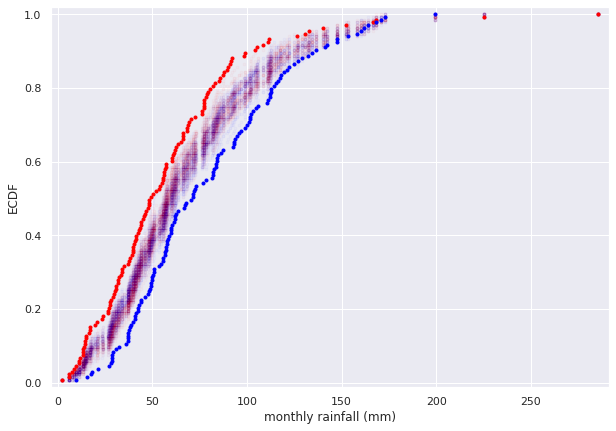

In [86]:
sns.set()
plt.figure(figsize = (10,7))
for i in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june, rain_november)


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

Obsérvese que las ECDF de las muestras de permutación se superponen y dan una niebla púrpura. Ninguna de las ECDF de las muestras de permutación se solapa con los datos observados, lo que sugiere que la hipótesis no se ajusta a los datos. Las precipitaciones de junio y noviembre no tienen una distribución idéntica.

## Prueba estadistica  y P-value 

 <b> NOTA </b>
- P-value NO ES LA PROBABILIDAD DE QUE LA HIPOTESIS NULA SEA CIERTA 
- P-value solo es significativo si la hipotesis nula es cierta
- una P < .05 quiere decir que es poco probable que la HO sea cierta, luego la rechazamos para abrazar la alternativa, pero siempre tenemos cierta probabilidad de cometer lo que se denomina un error de tipo 1: rechazar la hipótesis nula cuando en realidad es verdadera.

- P-value ES : la probabilidad de observar un estadístico de prueba igual o más extremo que el observado, dado que la hipótesis nula es verdadera.

Prueba de significacina de hipotesis nula o NHST

- statistical significance $ \neq $ practical significance

- Cuando planteas un test estadistico. Lo importante es ser pertinente a la pregunta que se pretende responder

In [87]:
# cap 3 generador de replicas de permutación 
def draw_perm_reps(data_1, data_2, func, size = 1):
  perm_replicates = np.empty(size)

  for i in range(size):
    perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

    perm_replicates[i] = func(perm_sample_1, perm_sample_2)
  
  return perm_replicates

### Mira antes de saltar: EDA antes de la prueba de hipótesis
- Kleinteich y Gorb (Sci. Rep., 4, 5225, 2014) realizaron un interesante experimento con ranas cornudas sudamericanas. Sostuvieron una placa conectada a un transductor de fuerza, junto con una mosca de cebo, frente a ellas. A continuación, midieron la fuerza de impacto y la fuerza de adhesión de la lengua de la rana al golpear el objetivo.

- La rana A es un adulto y la rana B es un juvenil. Los investigadores midieron la fuerza de impacto de 20 golpes de cada rana. En el siguiente ejercicio, comprobaremos la hipótesis de que las dos ranas tienen la misma distribución de fuerzas de impacto. Pero, recuerda, ¡es importante hacer primero el EDA! Vamos a hacer un gráfico de enjambre de abejas para los datos. Están almacenados en un DataFrame de pandas, df, donde la columna ID es la identidad de la rana y la columna fuerza_de_impacto es la fuerza de impacto en


### Prueba de permutación de los datos de las ranas

- La fuerza de golpeo media de la rana A fue de 0,71 newtons (N), y la de la rana B fue de 0,42 N, lo que supone una diferencia de 0,29 N. Es posible que las ranas golpeen con la misma fuerza y que esta diferencia observada sea fruto del azar. Se calculará la probabilidad de obtener al menos una diferencia de 0,29 N en la fuerza media de golpeo bajo la hipótesis de que las distribuciones de las fuerzas de golpeo de las dos ranas son idénticas. Utilizamos una prueba de permutación con un estadístico de prueba de la diferencia de medias para probar esta hipótesis.


In [88]:
e = [1.612, 0.605, 0.327, 0.946, 0.541, 1.539, 0.529, 0.628, 1.453,
       0.297, 0.703, 0.269, 0.751, 0.245, 1.182, 0.515, 0.435, 0.383,
       0.457, 0.73 ]

n = [0.172, 0.142, 0.037, 0.453, 0.355, 0.022, 0.502, 0.273, 0.72 ,
       0.582, 0.198, 0.198, 0.597, 0.516, 0.815, 0.402, 0.605, 0.711,
       0.614, 0.468]

force_a = np.array(e)
force_b = np.array(n)


In [89]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)
print(empirical_diff_means)
# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)


0.28825000000000006
p-value = 0.0058


El valor p le indica que hay aproximadamente un 0,6% de posibilidades de obtener la diferencia de medias observada en el experimento si las ranas fueran exactamente iguales. Un valor p inferior a 0,01 suele decirse que es "estadísticamente significativo", pero: ¡advertencia! ¡advertencia! Ha calculado un valor p; es un número. Te animo a que no lo reduzcas a una frase de sí o no. Se dice que p = 0,006 y p = 0,000000006 son "estadísticamente significativos", ¡pero definitivamente no son lo mismo!

### Una prueba de hipótesis bootstrap de una muestra
- Se estudió otra rana juvenil, la rana C, y usted quiere ver si la rana B y la rana C tienen fuerzas de impacto similares. Desgraciadamente, no tienes disponibles las fuerzas de impacto de la rana C, pero sabes que tienen una media de 0,55 N. Como no tienes los datos originales, no puedes hacer una prueba de permutación, y no puedes evaluar la hipótesis de que las fuerzas de la rana B y la rana C provienen de la misma distribución. Por lo tanto, probará otra hipótesis menos restrictiva: La fuerza media de golpeo de la rana B es igual a la de la rana C.

- Para establecer la prueba de hipótesis bootstrap, tomará la media como nuestra estadística de prueba. Recuerde, su objetivo es calcular la probabilidad de obtener una fuerza de impacto media menor o igual a la observada para la rana B si la hipótesis de que la media verdadera de las fuerzas de impacto de la rana B es igual a la de la rana C es verdadera. Primero se traducen todos los datos de la rana B de manera que la media sea 0,55 N. Esto implica sumar la fuerza media de la rana C y restar la fuerza media de la rana B de cada medición de la rana B. Esto deja otras propiedades de la distribución de la rana B, como la varianza, sin cambios.

In [90]:
# Make an array of translated impact forces: translated_force_b
translated_force_b = force_b - np.mean(force_b) + 0.55

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000

# Print the p-value
print('p = ', p)

p =  0.0046


 El bajo valor p sugiere que la hipótesis nula de que la rana B y la rana C tienen la misma fuerza de impacto media es falsa.

### Una prueba de hipótesis bootstrap de dos muestras para la diferencia de medias
- Ahora queremos probar la hipótesis de que la Rana A y la Rana B tienen la misma media de fuerza de impacto, pero no necesariamente la misma distribución, lo que también es imposible con una prueba de permutación.

- Para hacer la prueba bootstrap de dos muestras, cambiamos ambas matrices para que tengan la misma media, ya que estamos simulando la hipótesis de que sus medias son, de hecho, iguales. A continuación, extraemos muestras bootstrap de las matrices desplazadas y calculamos la diferencia de medias. Esto constituye una réplica bootstrap, y generamos muchas de ellas. El valor p es la fracción de réplicas con una diferencia de medias mayor o igual a la observada.

In [91]:
# Compute mean of all forces: mean_force
forces_concat = np.concatenate((force_a, force_b))
mean_force = np.mean(forces_concat)

# Generate shifted arrays
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, size=10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)


p-value = 0.0051


Has obtenido un resultado similar al de la prueba de permutación. No obstante, recuerde que es importante pensar cuidadosamente en la pregunta que quiere hacer. ¿Te interesa sólo la fuerza de impacto media o la distribución de las fuerzas de impacto?

### La votación de la Ley de Derechos Civiles en 1964

- La Ley de Derechos Civiles de 1964 fue una de las leyes más importantes que se han aprobado en los Estados Unidos. Excluyendo los votos de "presente" y "abstención", 153 demócratas y 136 republicanos de la Cámara de Representantes votaron a favor. Sin embargo, 91 demócratas y 35 republicanos votaron en contra. ¿Influyó la afiliación partidista en la votación?

- Para responder a esta pregunta, evaluarás la hipótesis de que el partido de un miembro de la Cámara no influye en su voto. Utilizarás la fracción de demócratas que votan a favor como estadística de prueba y evaluarás la probabilidad de observar una fracción de demócratas que votan a favor al menos tan pequeña como la fracción observada de 153/244. (Así es, al menos tan pequeña como. En 1964, fueron los demócratas los menos progresistas en cuestiones de derechos civiles). Para ello, permute las etiquetas de los partidos de los votantes de la Cámara y luego divídalos arbitrariamente en "demócratas" y "republicanos" y calcule la fracción de demócratas que votan a favor.



In [92]:
# Construct arrays of data: dems, reps
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)
 
def frac_yea_dems(dems, reps):
    """Compute fraction of Democrat yea votes."""
    frac = np.sum(dems) / len(dems)
    return frac

# Acquire permutation samples: perm_replicates
perm_replicates = draw_perm_reps(dems, reps, frac_yea_dems, 10000)

# Compute and print p-value: p
p = np.sum(perm_replicates <= 153/244) / len(perm_replicates)
print('p-value =', p)

p-value = 0.0002


 Este pequeño valor p sugiere que la identidad de partido tuvo mucho que ver con el voto. Es importante destacar que el Sur tenía una mayor fracción de representantes demócratas y, por consiguiente, también un mayor sesgo racista.

### Un análogo del tiempo en el sitio web

- Resulta que usted ya hizo una prueba de hipótesis análoga a una prueba A/B en la que le interesa saber cuánto tiempo se pasa en el sitio web antes y después de una campaña publicitaria. La fuerza de la lengua de la rana (una cantidad continua como el tiempo en el sitio web) es un análogo. "Antes" = Rana A y "después" = Rana B. Practiquemos esto de nuevo con algo que realmente es un escenario antes/después.

- Volvemos al conjunto de datos de no-hitter. En 1920, las Grandes Ligas de Béisbol implementaron importantes cambios en las reglas que pusieron fin a la llamada era de la bola muerta. Lo más importante es que ya no se permitía al lanzador escupir o raspar la bola, una actividad que favorece mucho a los lanzadores. En este problema, usted realizará una prueba A/B para determinar si estos cambios en las reglas resultaron en una tasa más lenta de no-hitters (es decir, mayor tiempo promedio entre no-hitters) usando la diferencia en el tiempo medio entre no-hitters como su estadística de prueba. Los tiempos entre no-hitters para las respectivas épocas se almacenan en las matrices nht_dead y nht_live, donde "nht" significa "no-hitter time".

In [93]:
p = [-1,  894,   10,  130,    1,  934,   29,    6,  485,  254,  372,
         81,  191,  355,  180,  286,   47,  269,  361,  173,  246,  492,
        462, 1319,   58,  297,   31, 2970,  640,  237,  434,  570,   77,
        271,  563, 3365,   89,    0,  379,  221,  479,  367,  628,  843,
       1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,  715,
        966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,  104,
       1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,  166,
         96,  702,   23,  524,   26,  299,   59,   39,   12,    2,  308,
       1114,  813,  887]
nht_dead = np.array(p)

q = [ 645, 2088,   42, 2090,   11,  886, 1665, 1084, 2900, 2432,  750,
       4021, 1070, 1765, 1322,   26,  548, 1525,   77, 2181, 2752,  127,
       2147,  211,   41, 1575,  151,  479,  697,  557, 2267,  542,  392,
         73,  603,  233,  255,  528,  397, 1529, 1023, 1194,  462,  583,
         37,  943,  996,  480, 1497,  717,  224,  219, 1531,  498,   44,
        288,  267,  600,   52,  269, 1086,  386,  176, 2199,  216,   54,
        675, 1243,  463,  650,  171,  327,  110,  774,  509,    8,  197,
        136,   12, 1124,   64,  380,  811,  232,  192,  731,  715,  226,
        605,  539, 1491,  323,  240,  179,  702,  156,   82, 1397,  354,
        778,  603, 1001,  385,  986,  203,  149,  576,  445,  180, 1403,
        252,  675, 1351, 2983, 1568,   45,  899, 3260, 1025,   31,  100,
       2055, 4043,   79,  238, 3931, 2351,  595,  110,  215,    0,  563,
        206,  660,  242,  577,  179,  157,  192,  192, 1848,  792, 1693,
         55,  388,  225, 1134, 1172, 1555,   31, 1582, 1044,  378, 1687,
       2915,  280,  765, 2819,  511, 1521,  745, 2491,  580, 2072, 6450,
        578,  745, 1075, 1103, 1549, 1520,  138, 1202,  296,  277,  351,
        391,  950,  459,   62, 1056, 1128,  139,  420,   87,   71,  814,
        603, 1349,  162, 1027,  783,  326,  101,  876,  381,  905,  156,
        419,  239,  119,  129,  467]
nht_live = np.array(q)        


In [94]:
# Compute the observed difference in mean inter-no-hitter times: nht_diff_obs
nht_diff_obs = diff_of_means(nht_dead, nht_live)

# Acquire 10,000 permutation replicates of difference in mean no-hitter time: perm_replicates
perm_replicates =  draw_perm_reps(nht_dead, nht_live, diff_of_means, 10000)


# Compute and print the p-value: p
p = np.sum(perm_replicates <= nht_diff_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0002


El valor p es de 0,0001, lo que significa que sólo una de sus 10.000 réplicas tuvo un resultado tan extremo como la diferencia real entre las épocas de pelota muerta y de pelota viva. Esto sugiere una fuerte significación estadística. Sin embargo, tenga cuidado, podría haber obtenido cero réplicas que fueran tan extremas como el valor observado. Esto sólo significa que el valor p es bastante pequeño, casi seguro que menor que 0,001.

### ECDF nht_live vs nht_dead 

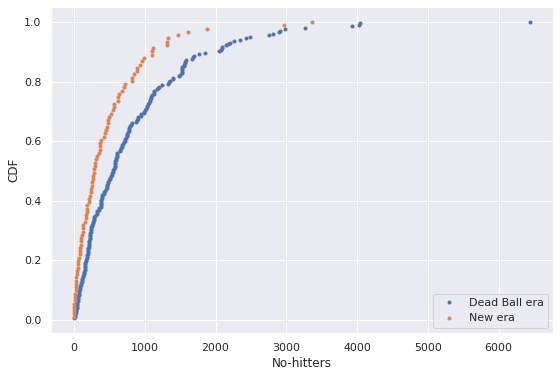

In [95]:
x_live, y_live = ecdf(nht_live)
x_dead, y_dead = ecdf(nht_dead)

sns.set()
plt.figure(figsize =(9,6))
_ = plt.plot(x_live, y_live, marker = '.', linestyle = 'none')
_ = plt.plot(x_dead, y_dead, marker = '.', linestyle = 'none' )

plt.legend(('Dead Ball era', 'New era'), loc = 'lower right')
_= plt.xlabel('No-hitters')
_= plt.ylabel('CDF')
plt.show()

Podemos ver es casi seguro de que la hipotesis nula no se cumpla, Las distribuciones no son iguales

### Prueba de hipótesis sobre la correlación de Pearson

- La correlación observada entre el analfabetismo femenino y la fecundidad puede ser sólo una casualidad; en realidad, la fecundidad de un determinado país puede ser totalmente independiente de su analfabetismo. Se va a poner a prueba esta hipótesis. Para ello, permute los valores de analfabetismo pero deje fijos los valores de fecundidad. Esto simula la hipótesis de que son totalmente independientes entre sí. Para cada permutación, calcule el coeficiente de correlación de Pearson y evalúe cuántas de sus réplicas de permutación tienen un coeficiente de correlación de Pearson mayor que el observado.



In [96]:
# Compute observed correlation: r_obs
r_obs =  pearson_r(illiteracy, fertility)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    illiteracy_permuted = np.random.permutation(illiteracy)

    # Compute Pearson correlation
    perm_replicates[i] =pearson_r(illiteracy_permuted, fertility)

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0


Has obtenido un valor p de cero. En la estadística hacker, esto significa que su valor p es muy bajo, ya que nunca obtuvo una sola réplica de las 10.000 que tomó que tuviera una correlación de Pearson mayor que la observada. Podría intentar aumentar el número de réplicas que toma para seguir moviendo el límite superior de su valor p cada vez más bajo.

### ¿Tienen los insecticidas neonicotinoides consecuencias no deseadas?

- Como último ejercicio de comprobación de hipótesis antes de ponerlo todo junto en nuestro estudio de caso en el próximo capítulo, investigarás los efectos de los insecticidas neonicotinoides en la reproducción de las abejas. Estos insecticidas son muy utilizados en Estados Unidos para combatir los pulgones y otras plagas que dañan las plantas.

- En un estudio reciente, Straub, et al. (Proc. Roy. Soc. B, 2016) investigaron los efectos de los neonicotinoides en el esperma de las abejas polinizadoras. En este ejercicio y en el siguiente, estudiarán cómo el tratamiento con pesticidas afectó al recuento de espermatozoides vivos por medio mililitro de semen.


- En primer lugar, haremos el EDA, como de costumbre. Trace las ECDF del recuento de espermatozoides vivos para las abejas no tratadas y las abejas tratadas con pesticida 

In [100]:
o = [ 4.159234,  4.408002,  0.172812,  3.498278,  3.104912,  5.164174,
        6.615262,  4.633066,  0.170408,  2.65    ,  0.0875  ,  1.997148,
        6.92668 ,  4.574932,  3.896466,  5.209814,  3.70625 ,  0.      ,
        4.62545 ,  3.01444 ,  0.732652,  0.4     ,  6.518382,  5.225   ,
        6.218742,  6.840358,  1.211308,  0.368252,  3.59937 ,  4.212158,
        6.052364,  2.115532,  6.60413 ,  5.26074 ,  6.05695 ,  6.481172,
        3.171522,  3.057228,  0.218808,  5.215112,  4.465168,  2.28909 ,
        3.732572,  2.17087 ,  1.834326,  6.074862,  5.841978,  8.524892,
        4.698492,  2.965624,  2.324206,  3.409412,  4.830726,  0.1     ,
        0.      ,  4.101432,  3.478162,  1.009688,  4.999296,  4.32196 ,
        0.299592,  3.606032,  7.54026 ,  4.284024,  0.057494,  6.036668,
        2.924084,  4.150144,  1.256926,  4.666502,  4.806594,  2.52478 ,
        2.027654,  2.52283 ,  4.735598,  2.033236,  0.      ,  6.177294,
        2.601834,  3.544408,  3.6045  ,  5.520346,  4.80698 ,  3.002478,
        3.559816,  7.075844, 10.      ,  0.139772,  6.17171 ,  3.201232,
        8.459546,  0.17857 ,  7.088276,  5.496662,  5.415086,  1.932282,
        3.02838 ,  7.47996 ,  1.86259 ,  7.838498,  2.242718,  3.292958,
        6.363644,  4.386898,  8.47533 ,  4.156304,  1.463956,  4.533628,
        5.573922,  1.29454 ,  7.547504,  3.92466 ,  5.820258,  4.118522,
        4.125   ,  2.286698,  0.591882,  1.273124,  0.      ,  0.      ,
        0.      , 12.22502 ,  7.601604,  5.56798 ,  1.679914,  8.77096 ,
        5.823942,  0.258374,  0.      ,  5.899236,  5.486354,  2.053148,
        3.25541 ,  2.72564 ,  3.364066,  2.43427 ,  5.282548,  3.963666,
        0.24851 ,  0.347916,  4.046862,  5.461436,  4.066104,  0.      ,
        0.065   ]

d = [1.342686, 1.058476, 3.793784, 0.40428 , 4.528388, 2.142966,
       3.937742, 0.1375  , 6.919164, 0.      , 3.597812, 5.196538,
       2.78955 , 2.3229  , 1.090636, 5.323916, 1.021618, 0.931836,
       2.78    , 0.412202, 1.180934, 2.8674  , 0.      , 0.064354,
       3.008348, 0.876634, 0.      , 4.971712, 7.280658, 4.79732 ,
       2.084956, 3.251514, 1.9405  , 1.566192, 0.58894 , 5.219658,
       0.977976, 3.124584, 1.297564, 1.433328, 4.24337 , 0.880964,
       2.376566, 3.763658, 1.918426, 3.74    , 3.841726, 4.69964 ,
       4.386876, 0.      , 1.127432, 1.845452, 0.690314, 4.185602,
       2.284732, 7.237594, 2.185148, 2.799124, 3.43218 , 0.63354 ,
       1.142496, 0.586   , 2.372858, 1.80032 , 3.329306, 4.028804,
       3.474156, 7.508752, 2.032824, 1.336556, 1.906496, 1.396046,
       2.488104, 4.759114, 1.07853 , 3.19927 , 3.814252, 4.275962,
       2.817056, 0.552198, 3.27194 , 5.11525 , 2.064628, 0.      ,
       3.34101 , 6.177322, 0.      , 3.66415 , 2.352582, 1.531696]

control = np.array(o)
treated = np.array(d)

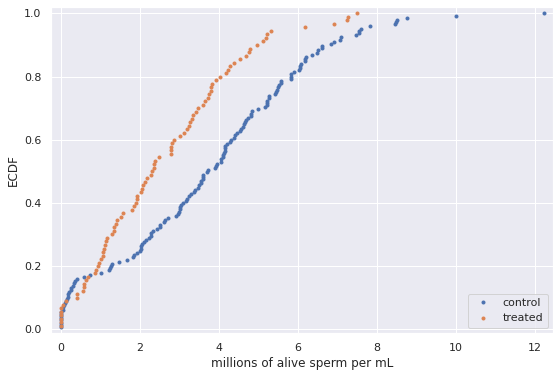

In [102]:
from matplotlib.ticker import FixedFormatter
# Compute x,y values for ECDFs
x_control, y_control = ecdf(control)
x_treated, y_treated = ecdf(treated)

# Plot the ECDFs
plt.figure(figsize = (9,6))
plt.plot(x_control, y_control, marker='.', linestyle='none')
plt.plot(x_treated,y_treated, marker='.', linestyle='none')

# Set the margins
plt.margins(0.02)

# Add a legend
plt.legend(('control', 'treated'), loc='lower right')

# Label axes and show plot
plt.xlabel('millions of alive sperm per mL')
plt.ylabel('ECDF')
plt.show()

Las ECDF muestran una diferencia bastante clara entre el tratamiento y el control; las abejas tratadas tienen menos espermatozoides vivos. Hagamos ahora una prueba de hipótesis

### Prueba de hipótesis Bootstrap sobre el recuento de esperma de abeja

- A continuación, se va a probar la siguiente hipótesis:

- En promedio, las abejas macho tratadas con insecticida neonicotinoide tienen el mismo número de espermatozoides activos por mililitro de semen que las abejas macho no tratadas. Utilizará la diferencia de medias como estadística de prueba.

In [105]:
# Compute the difference in mean sperm count: diff_means
diff_means = diff_of_means(control, treated)
# Compute mean of pooled data: mean_count
mean_count = np.mean(np.concatenate((control,treated)))

# Generate shifted data sets
control_shifted = control - np.mean(control) + mean_count
treated_shifted = treated - np.mean(treated) + mean_count

# Generate bootstrap replicates
bs_reps_control = draw_bs_reps(control_shifted,
                       np.mean, size=10000)
bs_reps_treated = draw_bs_reps(treated_shifted,
                       np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates =  bs_reps_control - bs_reps_treated 


# Compute and print p-value: p
p = np.sum(bs_replicates >= diff_means)  / len(bs_replicates)
print('p-value =', p)

p-value = 0.0001


El valor p es pequeño, muy probablemente inferior a 0,0001, ya que nunca se vio un bootstrap replicado con una diferencia de medias al menos tan extrema como la observada. De hecho, cuando hice el cálculo con 10 millones de réplicas, obtuve un valor p de 2e-05.